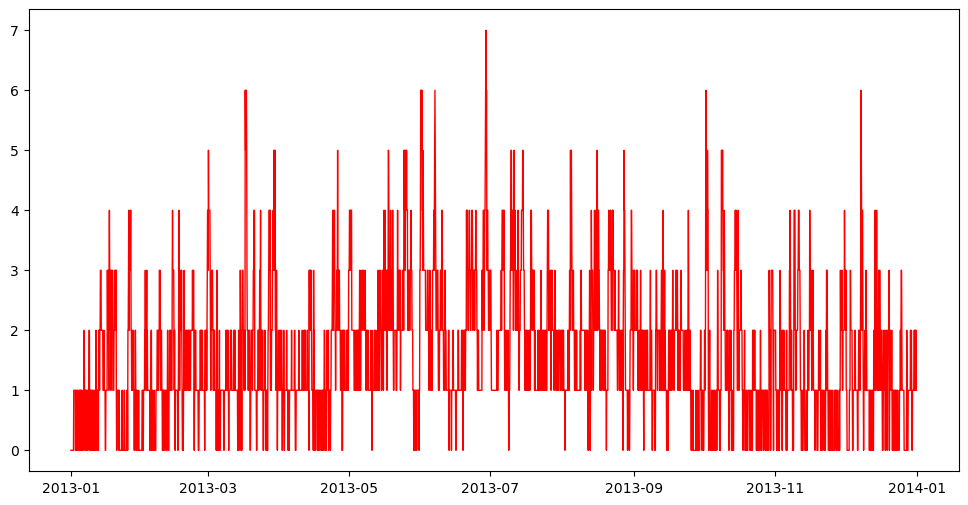

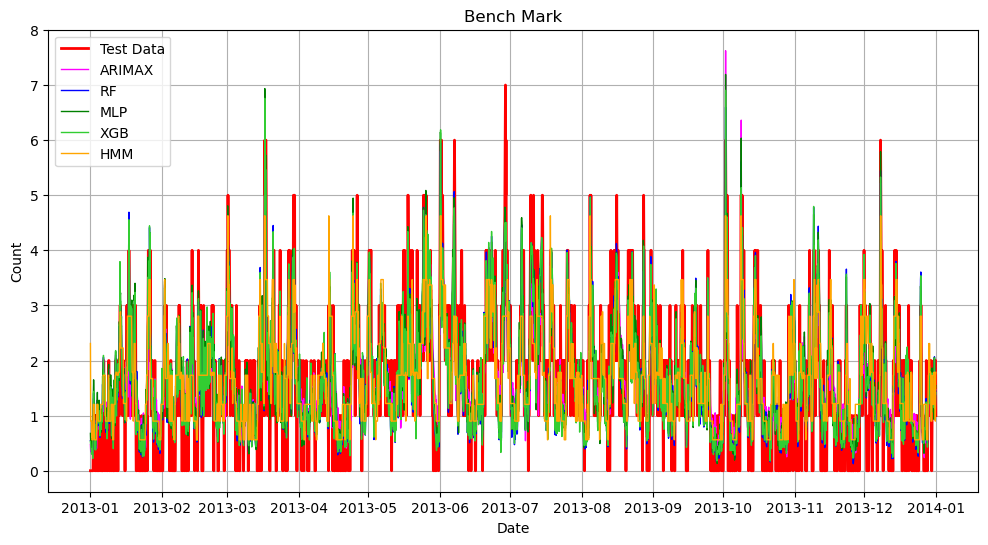

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 데이터 불러오기
ARIMAX = pd.read_csv('./Prediction/ARIMAX_Performance.csv')
RF = pd.read_csv('./Prediction/RF_Regressor_Performance.csv')
MLP = pd.read_csv('./Prediction/MLP_Performance.csv')
XGB = pd.read_csv('./Prediction/XGBoostReg_Performance.csv')
HMM = pd.read_csv('./Prediction/GaussainHMM_Performance.csv')
test = pd.read_csv('./test_set/test_Y_data.csv')


# 그래프에 사용할 컬럼 추출
test_dates = pd.to_datetime(test.iloc[:, 0])  # 첫 번째 컬럼 (날짜), 날짜 형식으로 변환
test_values = test.iloc[:, 1]  # 두 번째 컬럼 (값)
ARIMAX_values = ARIMAX.iloc[:, 1]  
RF_values = RF.iloc[:, 1] 
MLP_values = MLP.iloc[:, 1] 
XGB_values = XGB.iloc[:, 1] 
HMM_values = HMM.iloc[:, 1] 

# 데이터 시각화
plt.figure(figsize=(12, 6))
plt.plot(test_dates, test_values, label='Test Data', color='red', linewidth=1)  # 테스트 데이터 시각화
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(test_dates, test_values, label='Test Data', color='red', linewidth=2)  # 테스트 데이터 시각화
plt.plot(test_dates, ARIMAX_values, label='ARIMAX', color='magenta', linewidth=1)
plt.plot(test_dates, RF_values, label='RF', color='blue', linewidth=1) 
plt.plot(test_dates, MLP_values, label='MLP', color='green', linewidth=1) 
plt.plot(test_dates, XGB_values, label='XGB', color='limegreen', linewidth=1) 
plt.plot(test_dates, HMM_values, label='HMM', color='orange', linewidth=1) 

# x축 틱 설정
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # 1달 간격으로 설정
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # 날짜 형식 설정

plt.title('Bench Mark')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()


In [13]:
import pandas as pd

# 예측 결과를 딕셔너리로 정리
results = {
    "Model": ["ARIMAX", "RF_Reg", "MLP", "XGB_Reg", "HMM"],
    "Test RMSE": [0.7203, 0.6691, 0.6724, 0.6683, 0.8431],
    "Test WRMSE": [0.7938, 0.7177, 0.7067, 0.7198, 0.9451]
}

# 딕셔너리를 데이터프레임으로 변환
df = pd.DataFrame(results)

# print(df)

# 데이터프레임을 매트릭스로 출력
df.style.set_caption("Geomagnetic Disturbance Index Prediction").format({"Test RMSE": "{:.4f}", "Test WRMSE": "{:.4f}"})

,Model,Test RMSE,Test WRMSE
0,ARIMAX,0.7203,0.7938
1,RF_Reg,0.6691,0.7177
2,MLP,0.6724,0.7067
3,XGB_Reg,0.6683,0.7198
4,HMM,0.8431,0.9451
